# EDA, Cleaning, & Model building to predict global sales

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
rawdata = pd.read_csv('vgsales.csv')

In [7]:
rawdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
rawdata.shape

(16598, 11)

## Regression problem (sales is numerical)
## To do:
* Check missing cells/values
* drop "Rank" (irrelevant, given based on sales output)
* drop "Name" (mostly unique, repeated names are too little to analyse)
* convert "Platform" to numerical
* explore "Year" as numerical
* convert "Year" and explore as categorical
* convert "Genre" to numerical
* convert "Publisher" to numerical
* drop NA, EU, JP, Other sales (focusing only on global sales)
* mean global sales of 0.537(billion) copies

In [9]:
data = rawdata.drop(columns = ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [10]:
data.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37


In [ ]:
##BEFORE CLEANING

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

platnum = le.fit_transform(data['Platform'])
gennum = le.fit_transform(data['Genre'])
pubnum = le.fit_transform(data['Publisher'])
yearnum = le.fit_transform(data['Year'])

In [13]:
#encoded_plat = pd.DataFrame(platnum)
data['encoded_Platform'] = platnum
data['encoded_Genre'] = gennum
data['encoded_Publisher'] = pubnum
data['encoded_Year'] = yearnum
data['Global_Sales'] = data['Global_Sales'].apply(lambda x: x*1000)
print(data)

                                                   Name Platform  Year  \
0                                            Wii Sports      Wii  2006   
1                                     Super Mario Bros.      NES  1985   
2                                        Mario Kart Wii      Wii  2008   
3                                     Wii Sports Resort      Wii  2009   
4                              Pokemon Red/Pokemon Blue       GB  1996   
...                                                 ...      ...   ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594                     Men in Black II: Alien Escape       GC  2003   
16595  SCORE International Baja 1000: The Official Game      PS2  2008   
16596                                        Know How 2       DS  2010   
16597                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  Global_Sales  encoded_Platform  \
0            Sports    Nintendo       82740.

In [54]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1328
Wii     1325
X360    1265
PSP     1212
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
2007       1
GG         1
2010       1
PCFX       1
Name: Platform, dtype: int64

In [55]:
data['Genre'].value_counts()

Action                         3316
Sports                         2346
Misc                           1739
Role-Playing                   1488
Shooter                        1310
Adventure                      1284
Racing                         1249
Platform                        886
Simulation                      867
Fighting                        848
Strategy                        681
Puzzle                          582
Sony Computer Entertainment       1
Idea Factory                      1
Name: Genre, dtype: int64

In [56]:
data['Year'].value_counts()

2009         1431
2008         1428
2010         1258
2007         1201
2011         1139
2006         1008
2005          941
2002          829
2003          775
2004          763
2012          657
2015          614
2014          582
2013          546
2001          482
1998          379
2000          349
2016          344
1999          338
1997          289
1996          263
1995          219
1994          121
1993           60
1981           46
1992           43
1991           41
1982           36
1986           21
1983           17
1989           17
1987           16
1990           16
1988           15
1984           14
1985           14
1980            9
2017            3
Adventure       2
2020            1
Name: Year, dtype: int64

In [57]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64

In [ ]:
## look at Global Sales to observe outliers

<AxesSubplot:>

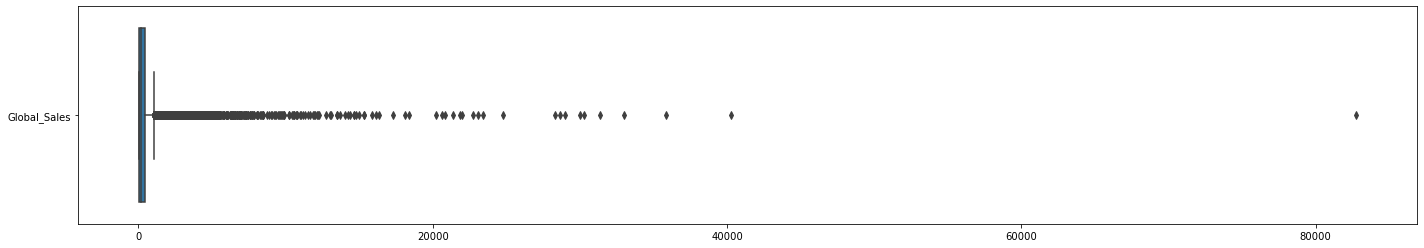

In [60]:
sale = pd.DataFrame(data['Global_Sales'])

f = plt.figure(figsize=(24, 4))
sb.boxplot(data = sale,orient = 'h')
#sb.histplot(data = data['Global_Sales'], ax = axes[0,1])
#sb.violinplot(data = data['Global_Sales'], orient = "h", ax = axes[0,2])

In [ ]:
## DATA CLEANING

In [17]:
newdata = data.dropna()

target = newdata[['Global_Sales']]

Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)

rule = ((target<(Q1-1.5*(Q3-Q1))) | (target>(Q3+1.5*(Q3-Q1))))

outliers = rule.any(axis = 1)

outlierindices = outliers.index[outliers == True]

newdata.drop(index=outlierindices, inplace = True)

newdata = newdata.sort_values('Year')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

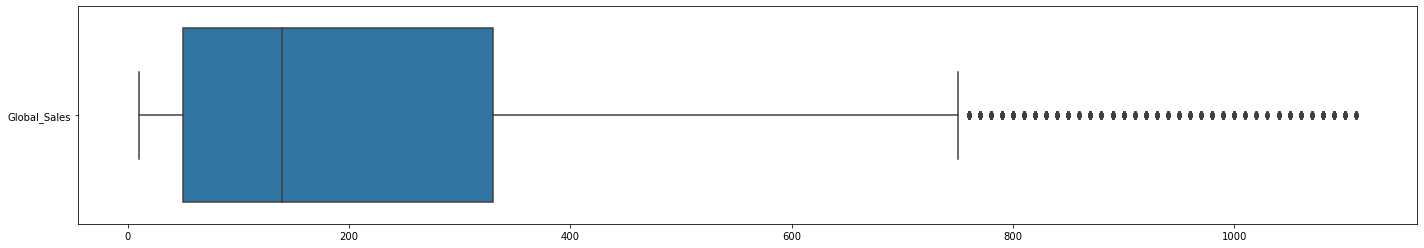

In [58]:
sale = pd.DataFrame(newdata['Global_Sales'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = sale,orient = 'h')

## Platform vs Sales

<Figure size 1440x1440 with 0 Axes>

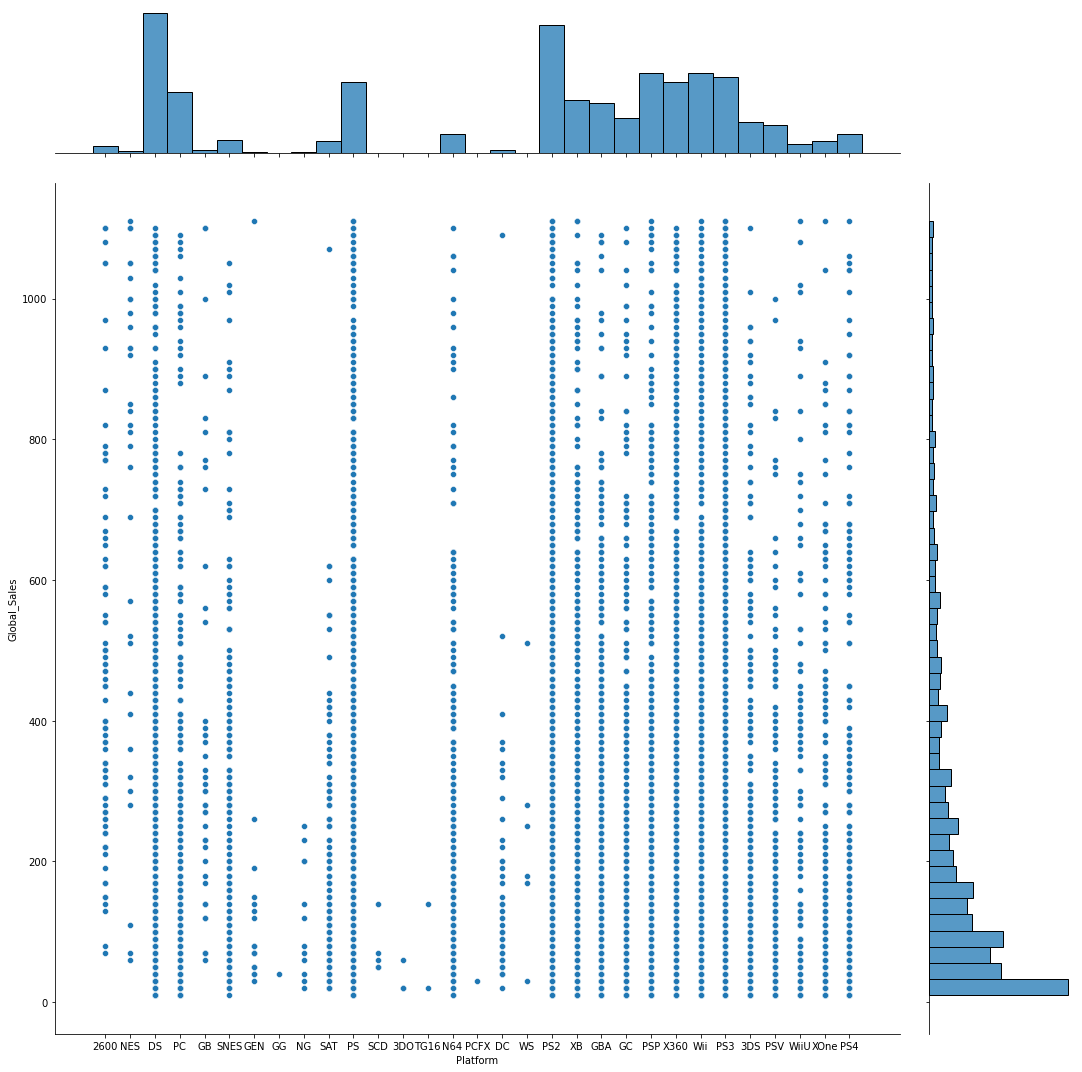

In [19]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Platform', y = 'Global_Sales', height = 15)

In [20]:
newdata['Platform'].value_counts()

DS      2009
PS2     1837
Wii     1157
PSP     1151
PS3     1090
X360    1029
PS      1016
PC       876
XB       758
GBA      723
GC       500
3DS      454
PSV      403
N64      270
PS4      269
SNES     194
XOne     172
SAT      171
WiiU     128
2600      98
DC        47
GB        46
NES       33
GEN       17
NG        12
WS         6
SCD        5
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

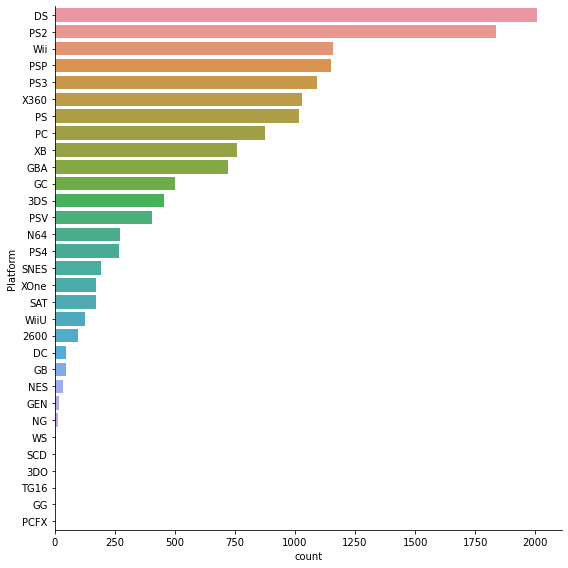

In [21]:
sb.catplot(y='Platform', data = newdata, kind = 'count', height = 8, order = newdata['Platform'].value_counts().index)

## Year vs Sales

<Figure size 1440x1440 with 0 Axes>

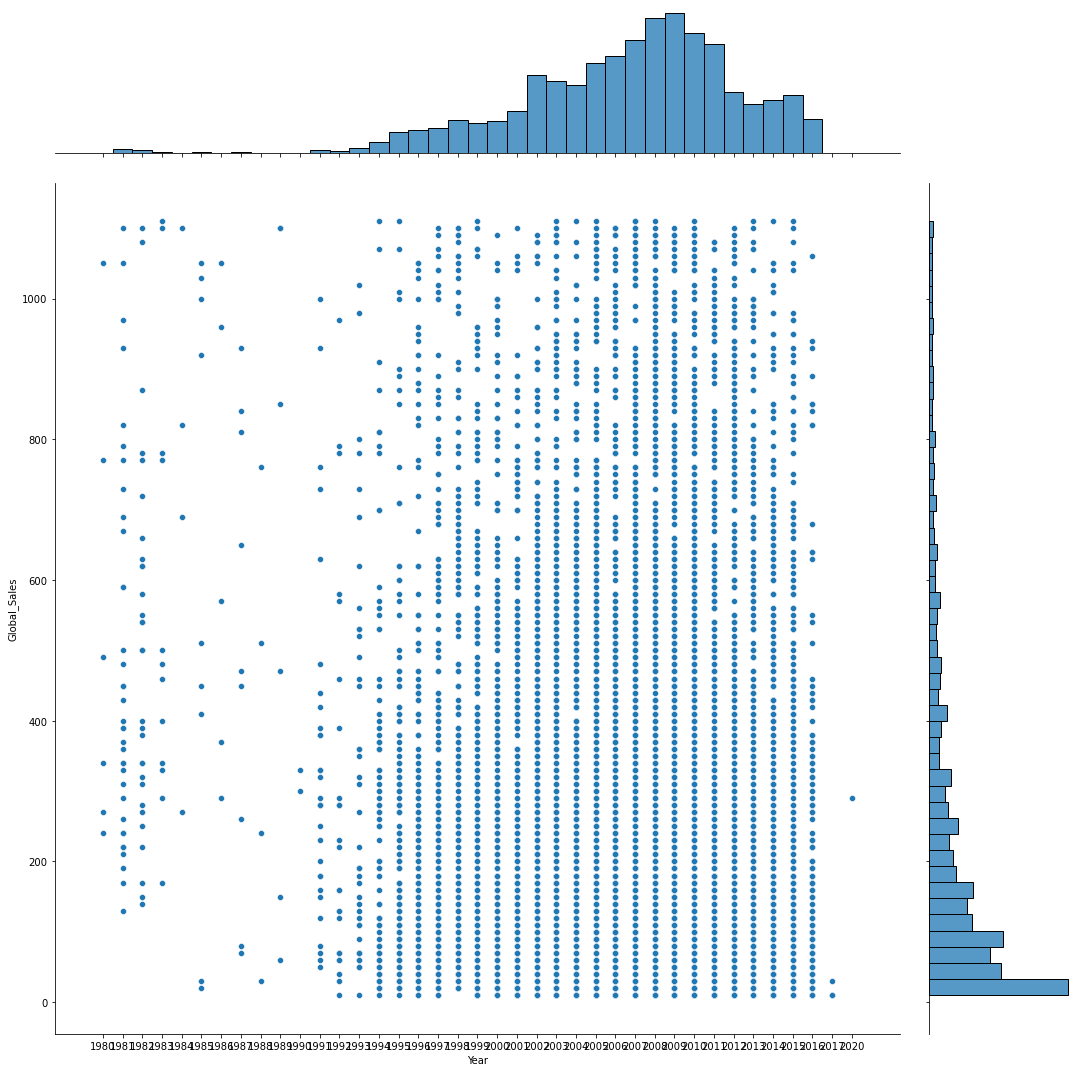

In [22]:

f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Year', y = 'Global_Sales', height = 15)

In [23]:
newdata['Year'].value_counts()

2009    1331
2008    1286
2010    1147
2007    1080
2011    1035
2006     927
2005     858
2002     740
2003     689
2004     646
2012     584
2015     557
2014     505
2013     465
2001     401
2016     328
1998     312
2000     302
1999     286
1997     240
1996     225
1995     202
1994     102
1993      46
1981      37
1991      31
1982      31
1992      24
1983      12
1987       9
1985       9
1980       6
1989       6
1986       5
1988       4
1984       4
2017       3
1990       2
2020       1
Name: Year, dtype: int64

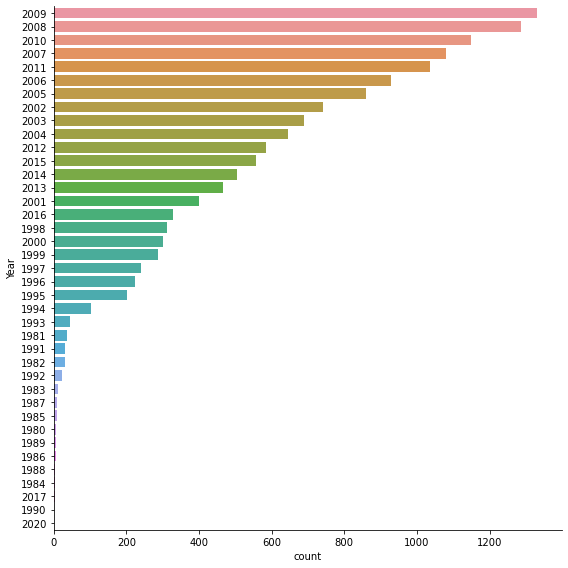

In [24]:
sb.catplot(y='Year', data = newdata, kind = 'count', height = 8, order = newdata['Year'].value_counts().index)

## Genre vs Sales

<Figure size 1440x1440 with 0 Axes>

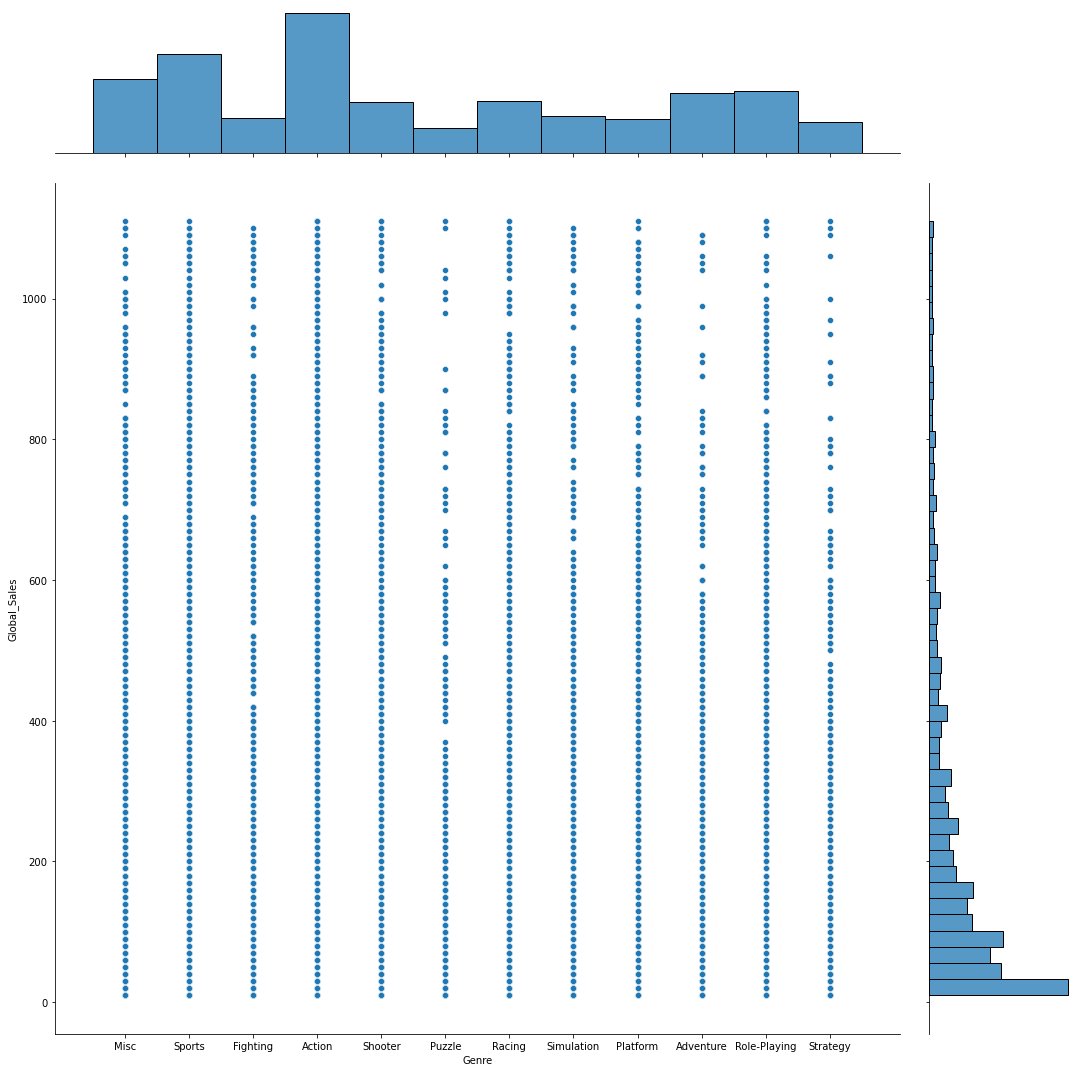

In [25]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Genre', y = 'Global_Sales', height = 15)

In [26]:
newdata['Genre'].value_counts()

Action          2885
Sports          2043
Misc            1537
Role-Playing    1283
Adventure       1238
Racing          1071
Shooter         1057
Simulation       769
Fighting         732
Platform         700
Strategy         643
Puzzle           520
Name: Genre, dtype: int64

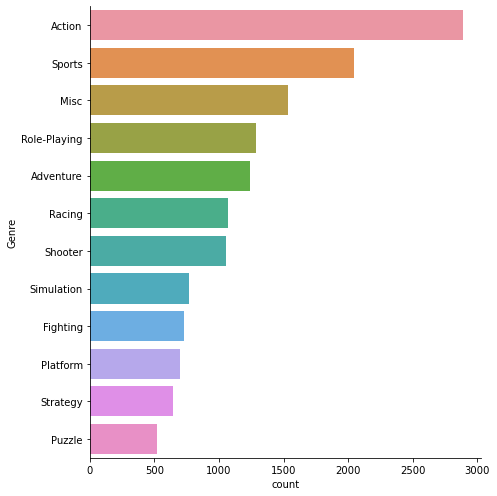

In [27]:
sb.catplot(y='Genre', data = newdata, kind = 'count', height = 7, order = newdata['Genre'].value_counts().index)

## Publisher vs Sales

<Figure size 3600x1440 with 0 Axes>

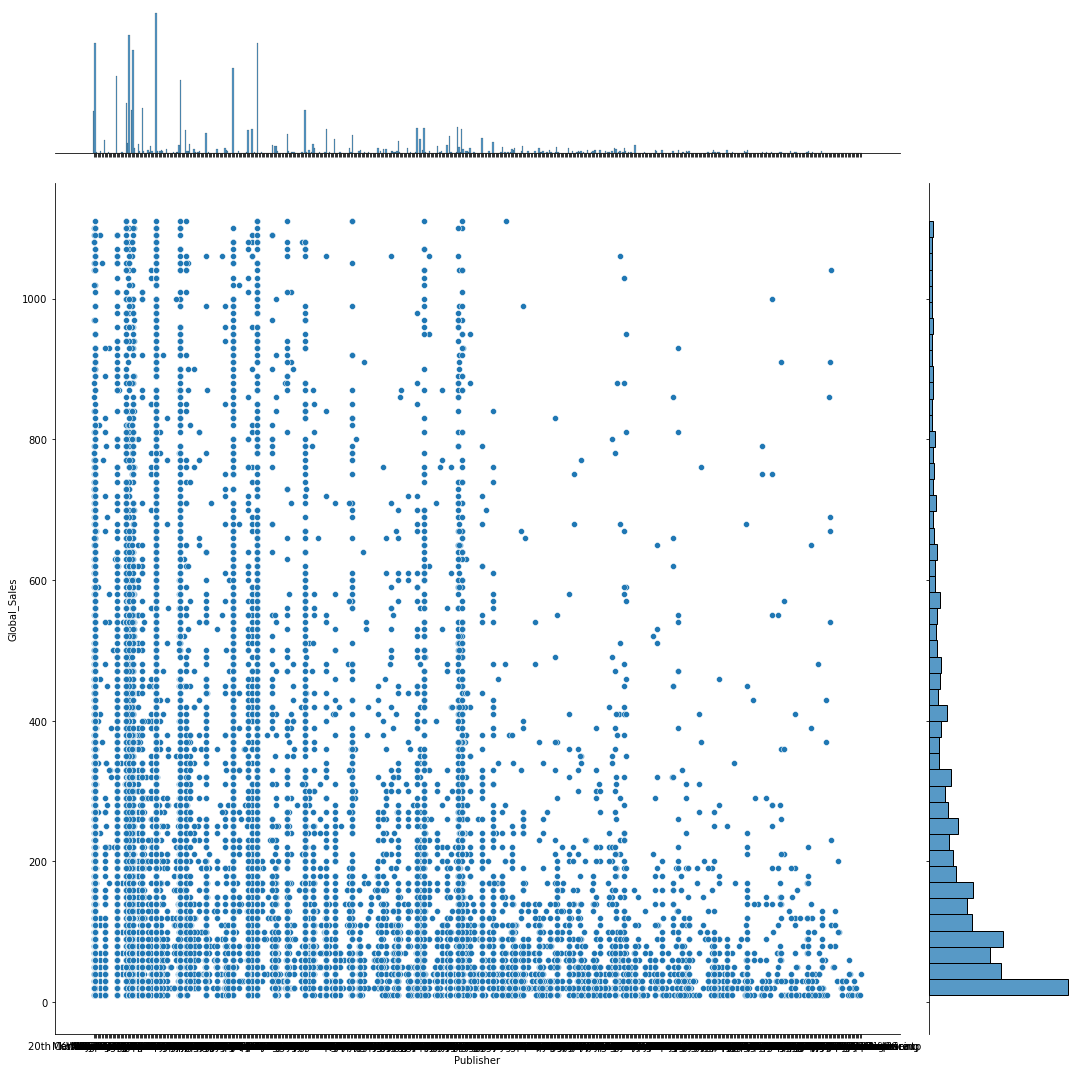

In [61]:
f = plt.figure(figsize = (50,20))
sb.jointplot(data = newdata, x = 'Publisher', y = 'Global_Sales', height = 15)

In [29]:
newdata['Publisher'].value_counts()

Electronic Arts                 1044
Namco Bandai Games               885
Activision                       823
Ubisoft                          822
Konami Digital Entertainment     768
                                ... 
SPS                                1
FunSoft                            1
American Softworks                 1
Milestone                          1
MLB.com                            1
Name: Publisher, Length: 568, dtype: int64

In [63]:
sb.catplot(y='Publisher', data = newdata, kind = 'count', height = 100, order = newdata['Publisher'].value_counts().index)

## Year vs Platform

<Figure size 1440x1440 with 0 Axes>

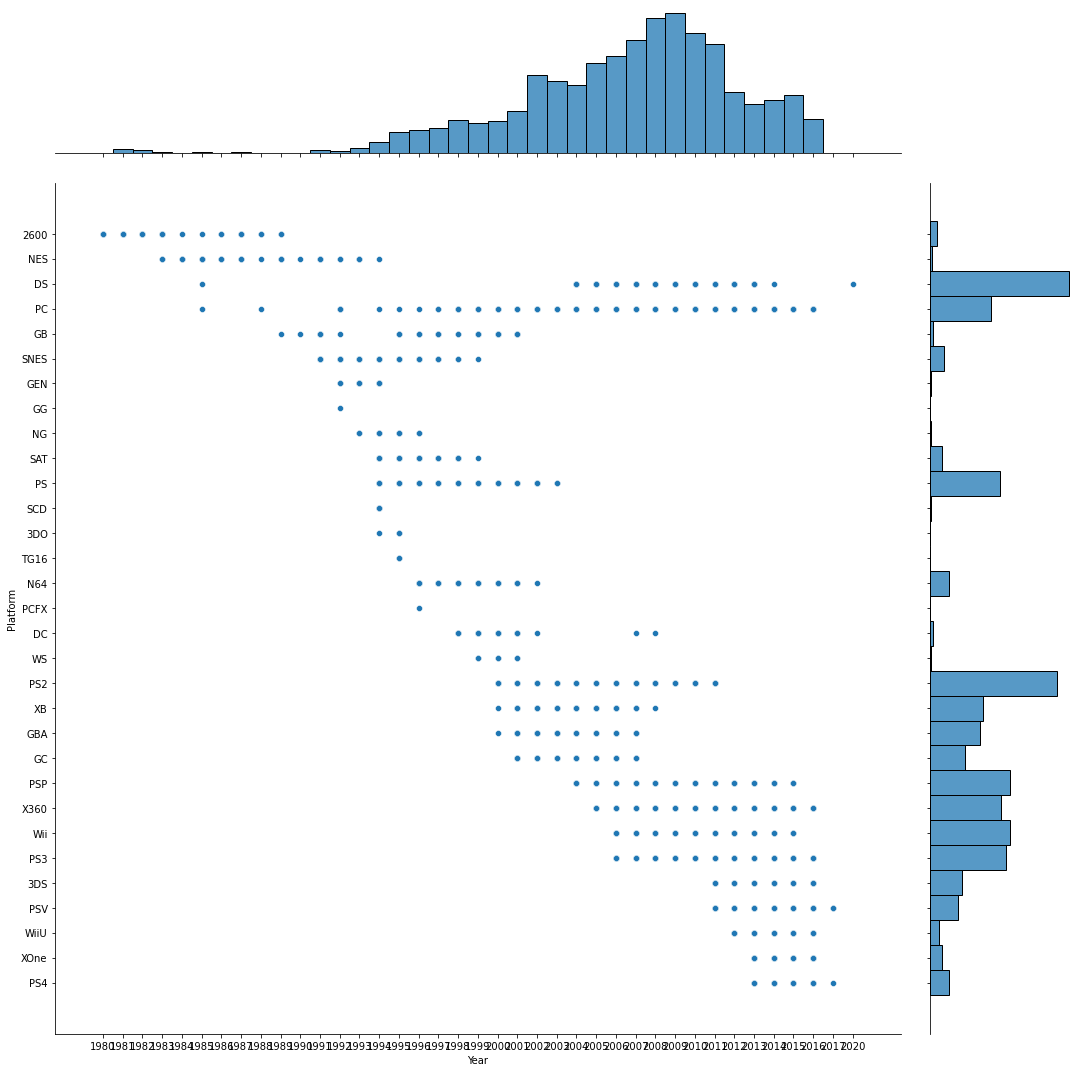

In [31]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Year', y = 'Platform', height = 15)

## Year vs Publisher

<Figure size 1440x1440 with 0 Axes>

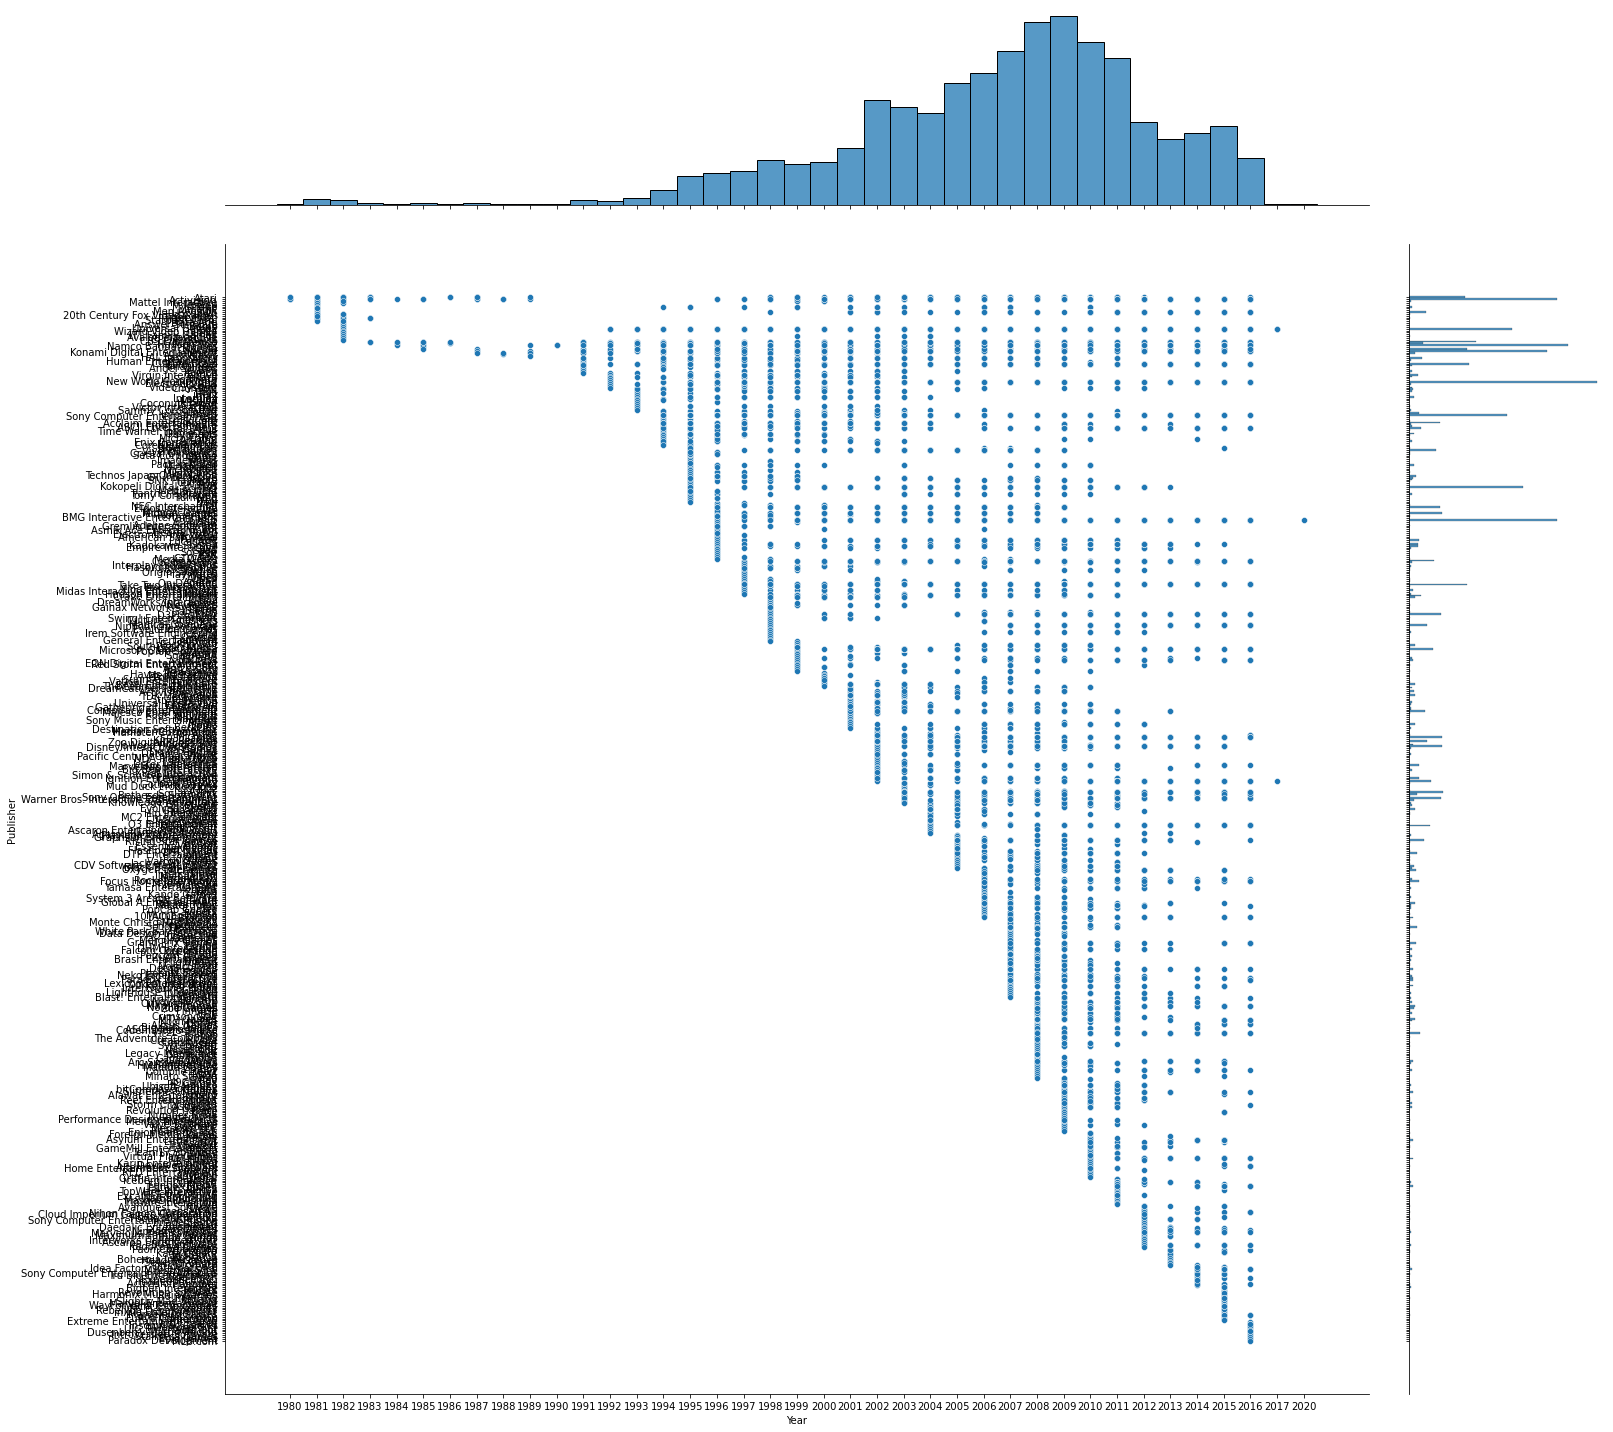

In [65]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Year', y = 'Publisher', height = 20)

## Year vs Genre

<Figure size 1440x1440 with 0 Axes>

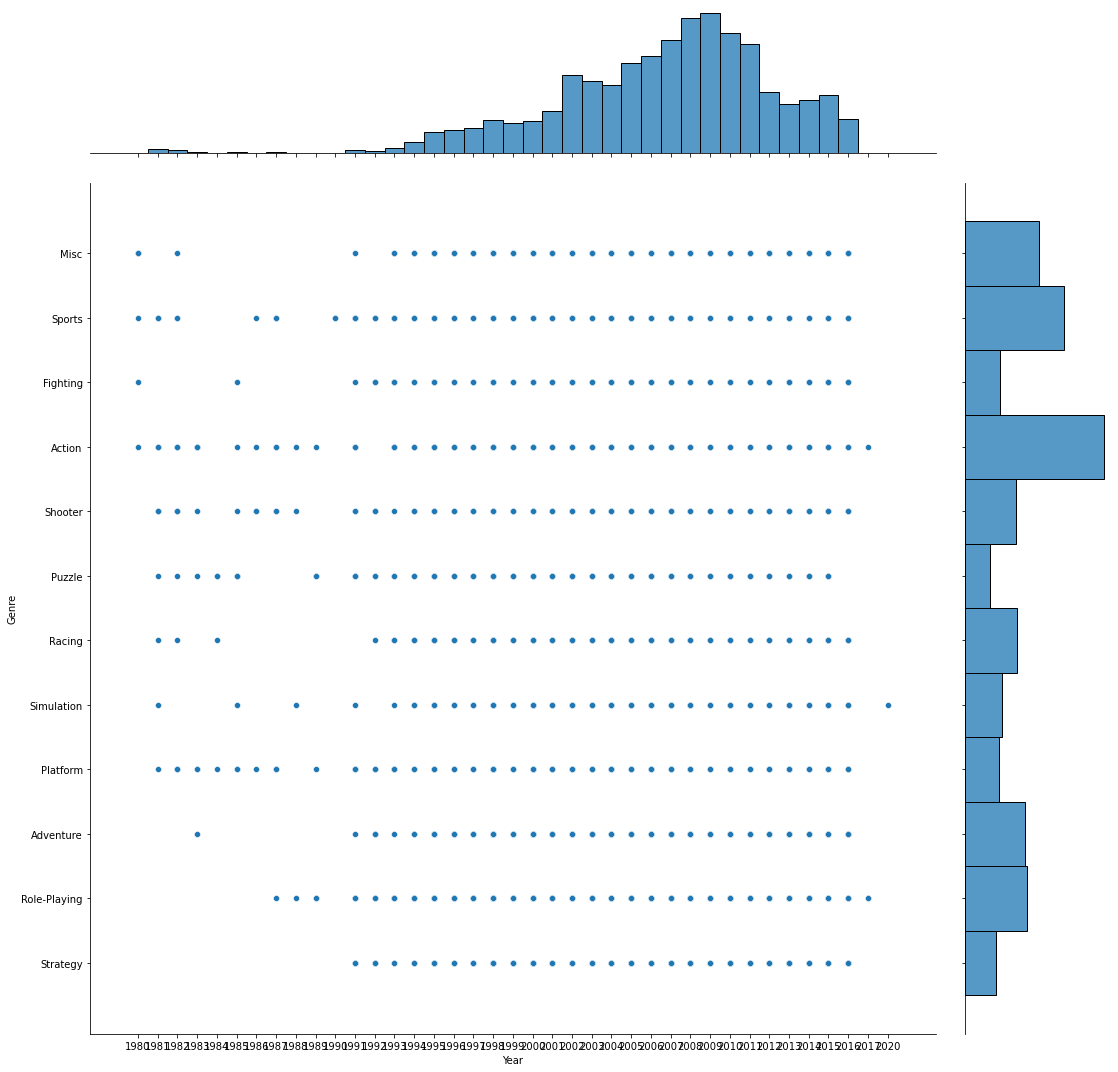

In [33]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Year', y = 'Genre', height = 15)

## Platform vs Publisher

<Figure size 1440x1440 with 0 Axes>

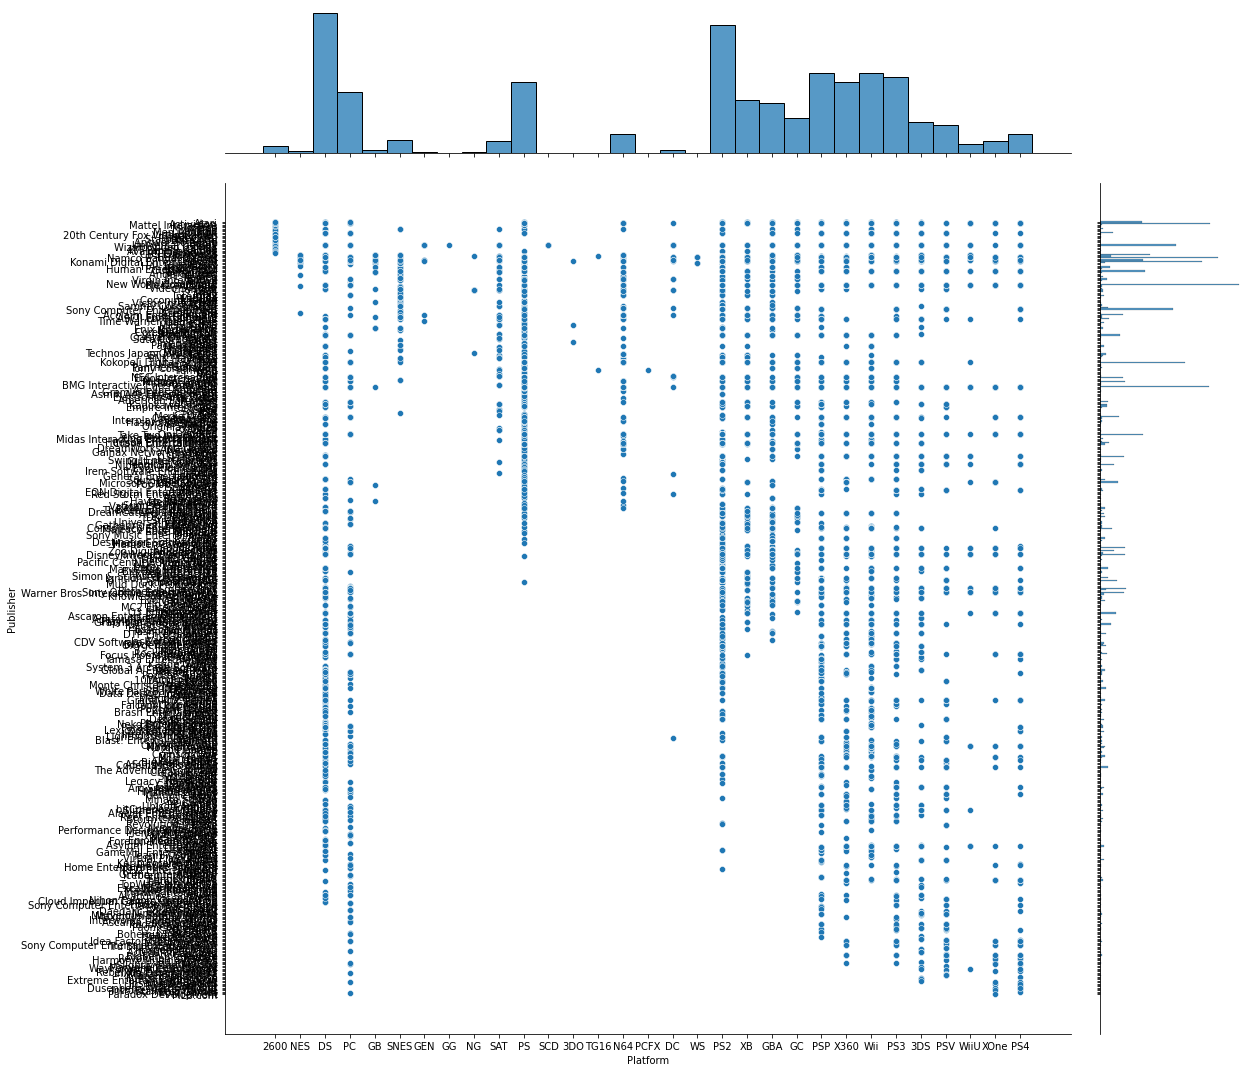

In [34]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Platform', y = 'Publisher', height = 15)

## Platform vs Genre

<Figure size 1440x1440 with 0 Axes>

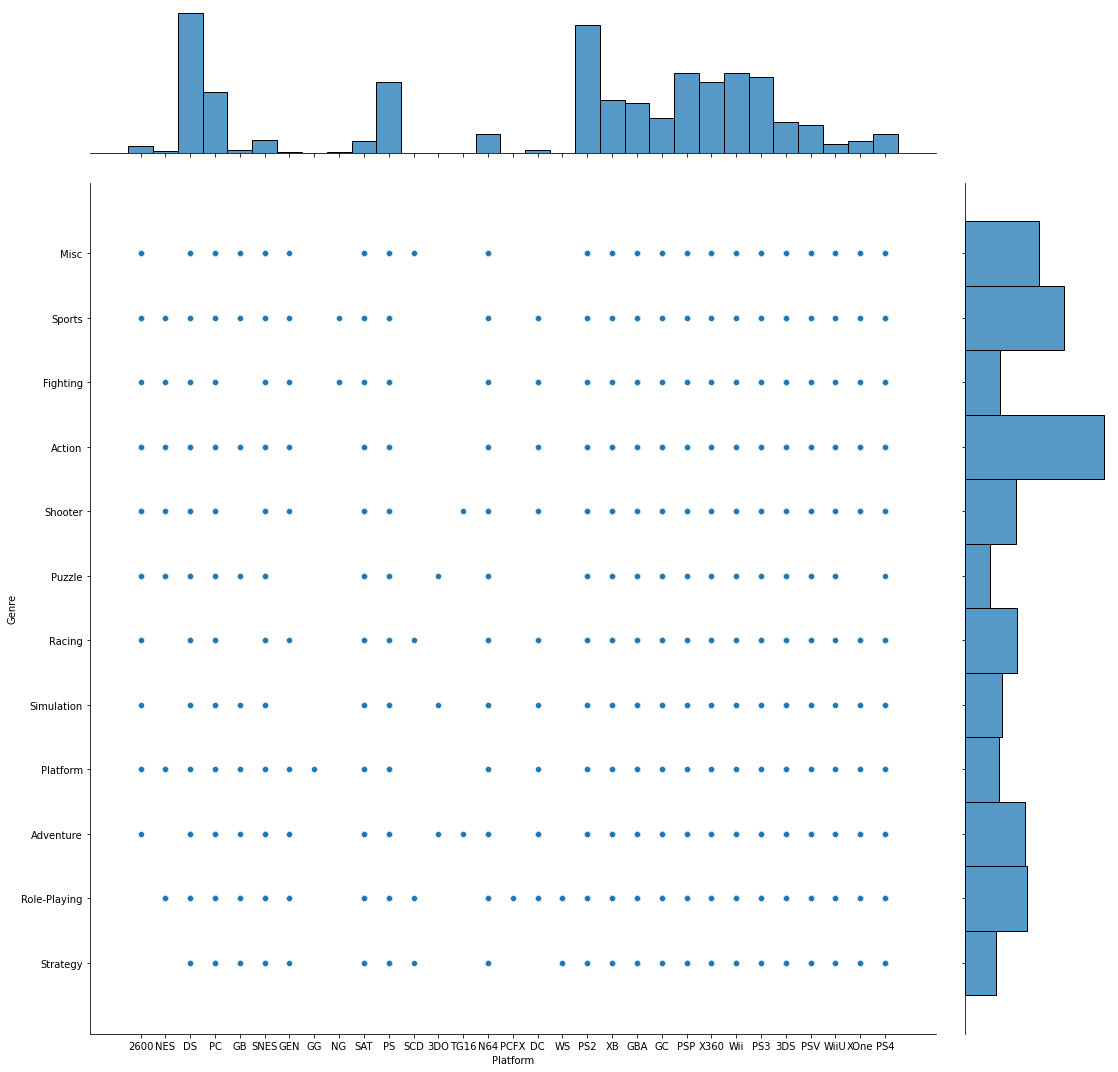

In [35]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Platform', y = 'Genre', height = 15)

## Publisher vs Genre

<Figure size 1440x1440 with 0 Axes>

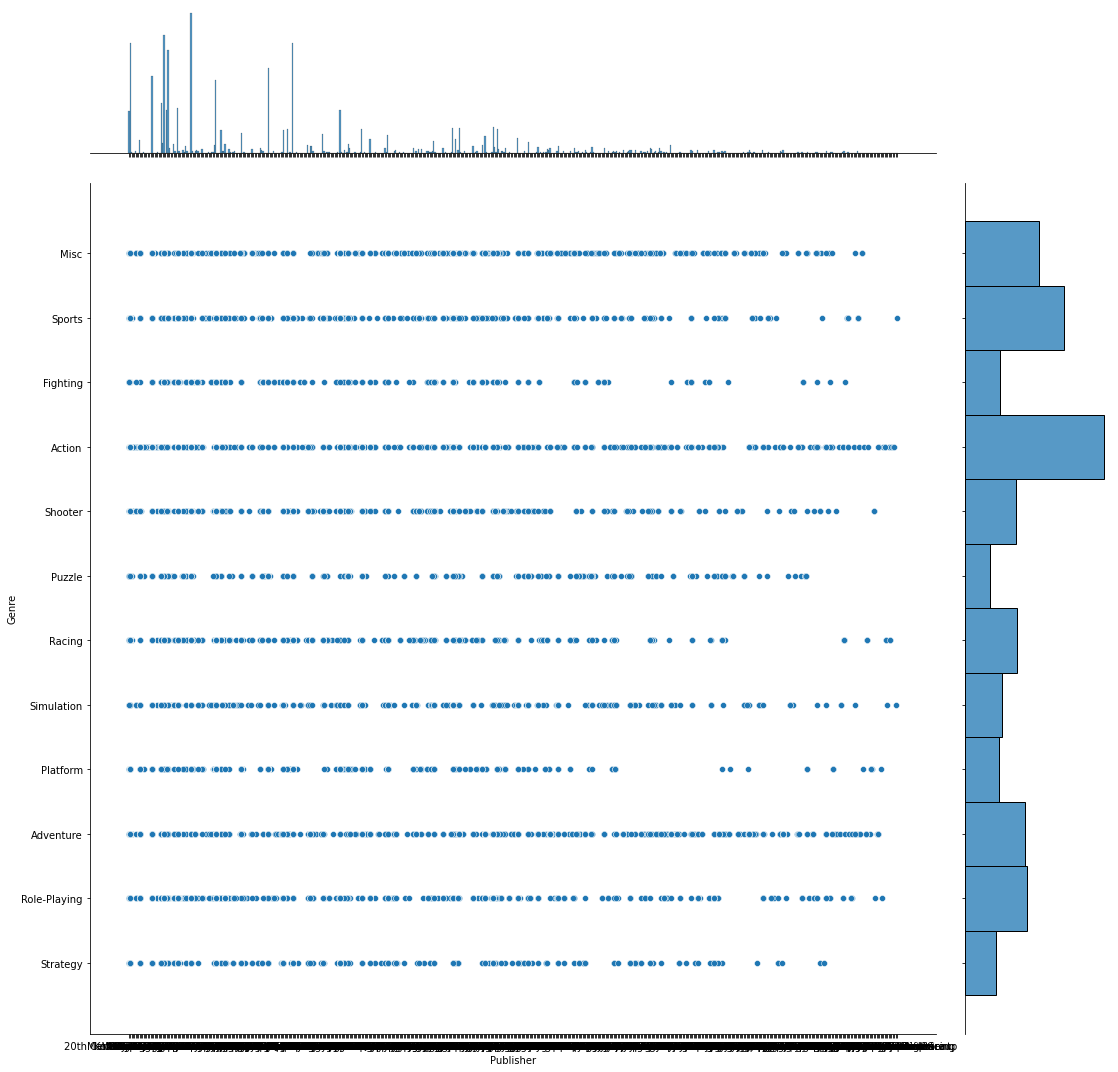

In [36]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = newdata, x = 'Publisher', y = 'Genre', height = 15)

# Split data

In [98]:
sales = pd.DataFrame(newdata['Global_Sales'])

pred = ['encoded_Platform', 'Year', 'encoded_Genre', 'encoded_Publisher']
x_data = pd.DataFrame(newdata[pred])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, sales, test_size = 0.25)

# Model building

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [101]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(random_state=42)

In [102]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [103]:
y_train_predlr = lr.predict(x_train)
y_test_predlr = lr.predict(x_test)

In [104]:
y_train_predgbr = gbr.predict(x_train)
y_test_predgbr = gbr.predict(x_test)

In [105]:
y_train_predrf = rf.predict(x_train)
y_test_predrf = rf.predict(x_test)

In [106]:
mae_lr1 = mean_absolute_error(y_train, y_train_predlr)
mse_lr1 = mean_squared_error(y_train, y_train_predlr)
r_lr1 = lr.score(x_train, y_train)
print("Goodness of Fit of Model \tTrain Dataset")
print("LR: Mean Absolute Error (MAE) \t:", mae_lr1)
print("LR: Mean Squared Error (MSE) \t:", mse_lr1)
print("LR: Explained Variance (R^2) \t:", r_lr1)
print()

mae_lr2 = mean_absolute_error(y_test, y_test_predlr)
mse_lr2 = mean_squared_error(y_test, y_test_predlr)
r_lr2 = lr.score(x_test, y_test)
print("Goodness of Fit of Model \tTest Dataset")
print("LR: Mean Absolute Error (MAE) \t:", mae_lr2)
print("LR: Mean Squared Error (MSE) \t:", mse_lr2)
print("LR: Explained Variance (R^2) \t:", r_lr2)

Goodness of Fit of Model 	Train Dataset
LR: Mean Absolute Error (MAE) 	: 186.9406885205486
LR: Mean Squared Error (MSE) 	: 59679.550341333954
LR: Explained Variance (R^2) 	: 0.02748711090588918

Goodness of Fit of Model 	Test Dataset
LR: Mean Absolute Error (MAE) 	: 190.10513148858502
LR: Mean Squared Error (MSE) 	: 61511.939529926145
LR: Explained Variance (R^2) 	: 0.01801954068816769


In [107]:
mae_gbr1 = mean_absolute_error(y_train, y_train_predgbr)
mse_gbr1 = mean_squared_error(y_train, y_train_predgbr)
r_gbr1 = gbr.score(x_train,y_train)
print("Goodness of Fit of Model \tTrain Dataset")
print("GBR: Mean Absolute Error (MAE) \t:", mae_gbr1)
print("GBR: Mean Squared Error (MSE) \t:", mse_gbr1)
print("GBR: Explained Variance (R^2) \t:", r_gbr1)
print()

mae_gbr2 = mean_absolute_error(y_test, y_test_predgbr)
mse_gbr2 = mean_squared_error(y_test, y_test_predgbr)
r_gbr2 = gbr.score(x_test, y_test)
print("Goodness of Fit of Model \tTest Dataset")
print("GBR: Mean Absolute Error (MAE) \t:", mae_gbr2)
print("GBR: Mean Squared Error (MSE) \t:", mse_gbr2)
print("GBR: Explained Variance (R^2) \t:", r_gbr2)

Goodness of Fit of Model 	Train Dataset
GBR: Mean Absolute Error (MAE) 	: 161.7392549061337
GBR: Mean Squared Error (MSE) 	: 47733.56497739404
GBR: Explained Variance (R^2) 	: 0.22215387151173804

Goodness of Fit of Model 	Test Dataset
GBR: Mean Absolute Error (MAE) 	: 169.06495877666904
GBR: Mean Squared Error (MSE) 	: 50895.83542433594
GBR: Explained Variance (R^2) 	: 0.18749569223494056


In [114]:
mae_rf1 = mean_absolute_error(y_train, y_train_predrf)
mse_rf1 = mean_squared_error(y_train, y_train_predrf)
r_rf1 = rf.score(x_train, y_train)
print("Goodness of Fit of Model \tTrain Dataset")
print("RF: Mean Absolute Error (MAE) \t:", mae_rf1)
print("RF: Mean Squared Error (MSE) \t:", mse_rf1)
print("RF: Explained Variance (R^2) \t:", r_rf1)
print()

mae_rf2 = mean_absolute_error(y_test, y_test_predrf)
mse_rf2 = mean_squared_error(y_test, y_test_predrf)
r_rf2 = rf.score(x_test, y_test)
print("Goodness of Fit of Model \tTest Dataset")
print("RF: Mean Absolute Error (MAE) \t:", mae_rf2)
print("RF: Mean Squared Error (MSE) \t:", mse_rf2)
print("RF: Explained Variance (R^2) \t:", r_rf2)

Goodness of Fit of Model 	Train Dataset
RF: Mean Absolute Error (MAE) 	: 85.3625140816884
RF: Mean Squared Error (MSE) 	: 16545.889440446488
RF: Explained Variance (R^2) 	: 0.7303751343579461

Goodness of Fit of Model 	Test Dataset
RF: Mean Absolute Error (MAE) 	: 171.89298305468458
RF: Mean Squared Error (MSE) 	: 57682.51089895985
RF: Explained Variance (R^2) 	: 0.07915277944921628


# Prediction

In [109]:
game_pred = newdata[newdata['Name'].isin(['Jungle Hunt', 'Megamania', 'Know How 2', 'Guitar Hero 5'])]
game_pred

,Name,Platform,Year,Genre,Publisher,Global_Sales,encoded_Platform,encoded_Genre,encoded_Publisher,encoded_Year
1848,Megamania,2600,1981,Shooter,Activision,1100.0,2,9,22,1
1851,Jungle Hunt,2600,1982,Platform,Atari,1100.0,2,5,54,2
1847,Guitar Hero 5,PS3,2009,Misc,Activision,1100.0,19,4,22,29
16596,Know How 2,DS,2010,Puzzle,7G//AMES,10.0,6,6,9,30


In [110]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(game_pred[pred])

# Predict LR Response corresponding to Predictors
y_predlr = lr.predict(X_pred)
y_predlr

# Predict GBR Response corresponding to Predictors
y_predgbr = gbr.predict(X_pred)
y_predgbr

# Predict RF Response corresponding to Predictors
y_predrf = rf.predict(X_pred)
y_predrf

array([809.9       , 950.12333333, 733.69186147,  17.8       ])

In [111]:
y_predlr = pd.DataFrame(y_predlr, columns = ["PredTotal"], index = game_pred.index)
gamedata_acclr = pd.concat([game_pred[["Name", "Global_Sales"]], y_predlr], axis = 1)

y_errslr = 100 * abs(gamedata_acclr["Global_Sales"] - gamedata_acclr["PredTotal"]) / gamedata_acclr["Global_Sales"]
y_errslr = pd.DataFrame(y_errslr, columns = ["Error"], index = game_pred.index)
game_acclr = pd.concat([gamedata_acclr, y_errslr], axis = 1)

gamedata_acclr

,Name,Global_Sales,PredTotal
1848,Megamania,1100.0,341.207645
1851,Jungle Hunt,1100.0,330.518332
1847,Guitar Hero 5,1100.0,214.692994
16596,Know How 2,10.0,171.915635


In [112]:
y_predgbr = pd.DataFrame(y_predgbr, columns = ["PredTotal"], index = game_pred.index)
gamedata_accgbr = pd.concat([game_pred[["Name", "Global_Sales"]], y_predgbr], axis = 1)

y_errsgbr = 100 * abs(gamedata_accgbr["Global_Sales"] - gamedata_accgbr["PredTotal"]) / gamedata_accgbr["Global_Sales"]
y_errsgbr = pd.DataFrame(y_errsgbr, columns = ["Error"], index = game_pred.index)
game_accgbr = pd.concat([gamedata_accgbr, y_errsgbr], axis = 1)

gamedata_accgbr

,Name,Global_Sales,PredTotal
1848,Megamania,1100.0,577.970499
1851,Jungle Hunt,1100.0,601.505439
1847,Guitar Hero 5,1100.0,352.147298
16596,Know How 2,10.0,102.859196


In [113]:
y_predrf = pd.DataFrame(y_predrf, columns = ["PredTotal"], index = game_pred.index)
gamedata_accrf = pd.concat([game_pred[["Name", "Global_Sales"]], y_predrf], axis = 1)

y_errsrf = 100 * abs(gamedata_accrf["Global_Sales"] - gamedata_accrf["PredTotal"]) / gamedata_accrf["Global_Sales"]
y_errsrf = pd.DataFrame(y_errsrf, columns = ["Error"], index = game_pred.index)
game_accrf = pd.concat([gamedata_accrf, y_errsrf], axis = 1)

gamedata_accrf

,Name,Global_Sales,PredTotal
1848,Megamania,1100.0,809.900000
1851,Jungle Hunt,1100.0,950.123333
1847,Guitar Hero 5,1100.0,733.691861
16596,Know How 2,10.0,17.800000
